In [4]:
%matplotlib inline
#
from os import chdir, getcwd
ROOTF = 'LRG-Signed'
if getcwd()[-len(ROOTF):] != ROOTF:
    chdir('../')
print('cwd:', getcwd())
#
from src.LRGSG_package.LRGSG import *

cwd: /home/giulio/PhD/projects/complex-networks/LRG-Signed


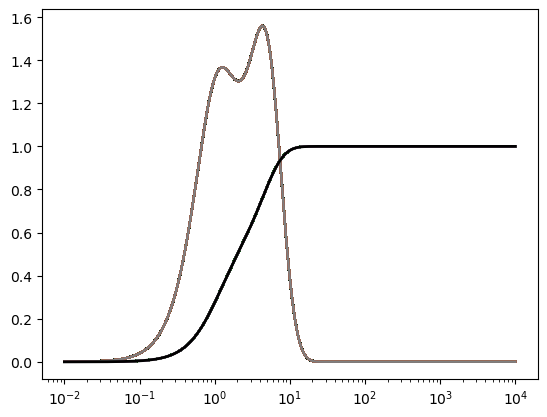

In [8]:
bb = np.fromfile("data/l2d_sq/N=64_navg=1024/p=0.001_Sm1.bin").reshape(1024, 1500)
for i in bb:
    plt.plot(np.logspace(-2, 4, 1500),i)
    plt.plot(np.logspace(-2, 4, 1499),np.log(64) * np.diff(i)/np.diff(np.log(np.logspace(-2, 4, 1500))))
plt.plot(np.logspace(-2, 4, 1500),np.mean(bb, axis=0), 'k', lw=2)
plt.xscale('log')

In [3]:
os.getcwd()

'/home/giulio/PhD/projects/complex-networks/LRG-Signed/notebooks'

In [3]:
L = 20
#
L2 = L * L
plen = 5
p_list = np.array([2 * L2 * p // (plen + 1) for p in range(1, plen + 1)])

In [4]:
no_p = 10
no_rw = 5
pow2_m = 6
pow2_M = 14

lsN = np.array([2**i for i in range(pow2_m, pow2_M, 2)])
lsNavg = 2**np.array([(pow2_M-i+1) for i in range(pow2_m, pow2_M, 2)])

/home/opisthofulax/PhD/projects/complex-networks/LRG-Signed/notebooks/../src/LRGSG_package/LRGSG.py:78: RuntimeWarning: divide by zero encountered in log
  S[i] = -np.nansum(rho * np.log(rho)) / np.log(N)
/home/opisthofulax/PhD/projects/complex-networks/LRG-Signed/notebooks/../src/LRGSG_package/LRGSG.py:78: RuntimeWarning: invalid value encountered in multiply
  S[i] = -np.nansum(rho * np.log(rho)) / np.log(N)
/home/opisthofulax/PhD/projects/complex-networks/LRG-Signed/notebooks/../src/LRGSG_package/LRGSG.py:75: RuntimeWarning: overflow encountered in exp
  rhoTr = np.exp(-tau * w)
/home/opisthofulax/PhD/projects/complex-networks/LRG-Signed/notebooks/../src/LRGSG_package/LRGSG.py:77: RuntimeWarning: invalid value encountered in divide
  rho = np.divide(rhoTr, Tr)
/home/opisthofulax/PhD/projects/complex-networks/LRG-Signed/notebooks/../src/LRGSG_package/LRGSG.py:79: RuntimeWarning: invalid value encountered in scalar divide
  avgrho = np.nansum(np.multiply(w, rhoTr)) / Tr
/home/opisthof

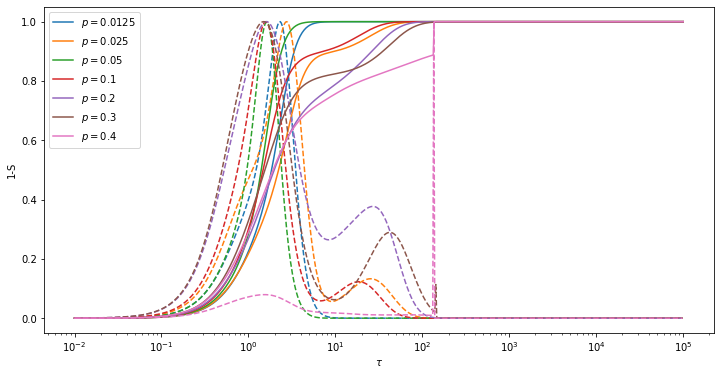

In [4]:
plt.figure(figsize=(12, 6))
t1Sm1Avg = []
t1CsAvg = []
p_list = [10, 20, 40, 80, 160, 240, 320]
for p in p_list:
    G = nx.grid_2d_graph(L, L, periodic=True)

    ransample = random.sample(range(len(G.edges())), p)
    for i,e in enumerate(G.edges()):
        G.add_edge(e[0], e[1], weight=1)
        if i in ransample:
            G[e[0]][e[1]]['weight'] = -1
    [Sm1, dS1, VarL1, t1] = entropy(G, is_signed=False)
    t1Sm1Avg.append([t1, Sm1])
    plt.plot(t1, Sm1, label=fr'$p={p/(2 *L2)}$')
    t11 = (t1[1:]+t1[:-1])/2.0
    plt.plot(t11, dS1/np.max(dS1), ls='--',
                color=plt.gca().lines[-1].get_color())
    t1CsAvg.append([t11, dS1])

plt.ylabel('1-S')
plt.xlabel(r'$\tau$')
# plt.ylim(0, 5)
plt.xscale('log')
plt.legend()


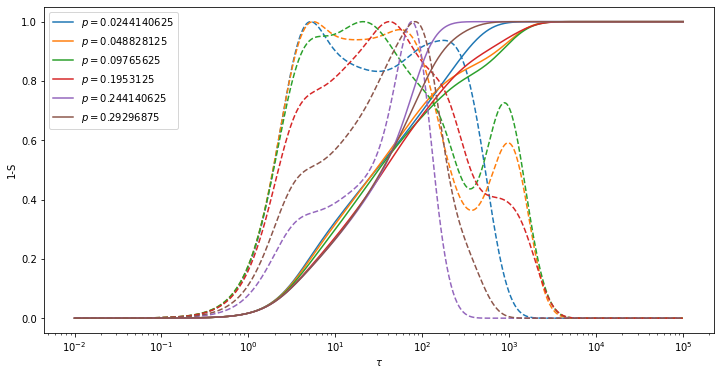

In [22]:
plt.figure(figsize=(12, 6))
t1Sm1Avg = []
t1CsAvg = []
p_list = [50, 100, 200, 400, 500, 600]
for p in p_list:
    G = nx.grid_2d_graph(L, L, periodic=True)

    ransample = random.sample(range(len(G.edges())), p)
    for i,e in enumerate(G.edges()):
        G.add_edge(e[0], e[1], weight=1)
        if i in ransample:
            G[e[0]][e[1]]['weight'] = -1
    [Sm1, dS1, VarL1, t1] = entropy(G, is_signed=True)
    t1Sm1Avg.append([t1, Sm1])
    plt.plot(t1, Sm1, label=fr'$p={p/(2 *L2)}$')
    t11 = (t1[1:]+t1[:-1])/2.0
    plt.plot(t11, dS1/np.max(dS1), ls='--',
                color=plt.gca().lines[-1].get_color())
    t1CsAvg.append([t11, dS1])

plt.ylabel('1-S')
plt.xlabel(r'$\tau$')
# plt.ylim(0, 5)
plt.xscale('log')
plt.legend()

/home/opisthofulax/PhD/projects/complex-networks/LRG-Signed/notebooks/../src/LRGSG_package/LRGSG.py:75: RuntimeWarning: invalid value encountered in divide
  rho = np.divide(rhoTr, Tr)
/home/opisthofulax/PhD/projects/complex-networks/LRG-Signed/notebooks/../src/LRGSG_package/LRGSG.py:77: RuntimeWarning: invalid value encountered in scalar divide
  avgrho = np.nansum(np.multiply(w, rhoTr)) / Tr
/home/opisthofulax/PhD/projects/complex-networks/LRG-Signed/notebooks/../src/LRGSG_package/LRGSG.py:78: RuntimeWarning: invalid value encountered in scalar divide
  av2rho = np.nansum(np.multiply(np.multiply(w,w), rhoTr)) / Tr


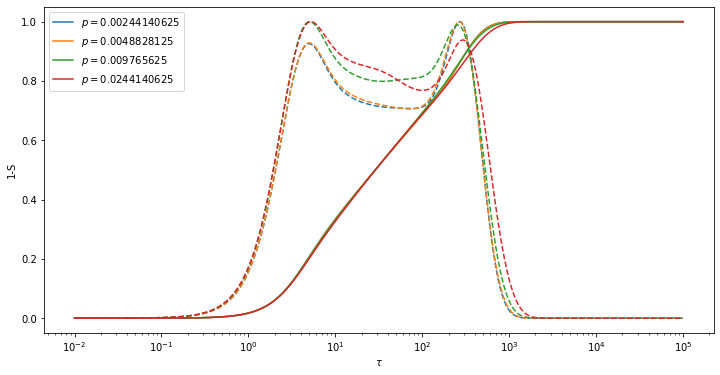

In [19]:
L = 32
L2= L*L
plt.figure(figsize=(12, 6))
t1Sm1Avg = []
t1CsAvg = []
for p in [5, 10, 20, 50]:
    G = nx.grid_2d_graph(L, L, periodic=True)

    ransample = random.sample(range(len(G.edges())), p)
    for i,e in enumerate(G.edges()):
        G.add_edge(e[0], e[1], weight=1)
        if i in ransample:
            G[e[0]][e[1]]['weight'] = -1
    [Sm1, dS1, VarL1, t1] = entropy(G, is_signed=True, t2=5)
    t1Sm1Avg.append([t1, Sm1])
    plt.plot(t1, Sm1, label=fr'$p={p/(2 *L2)}$')
    t11 = (t1[1:]+t1[:-1])/2.0
    plt.plot(t11, dS1/np.max(dS1), ls='--',
                color=plt.gca().lines[-1].get_color())
    # t1CsAvg.append([t11, dS1])

plt.ylabel('1-S')
plt.xlabel(r'$\tau$')
# plt.ylim(0, 5)
plt.xscale('log')
# plt.yscale('log')
plt.legend()

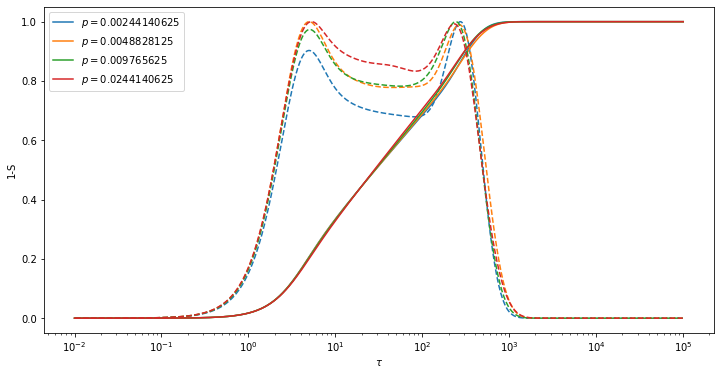

In [20]:
L = 32
L2= L*L
plt.figure(figsize=(12, 6))
t1Sm1Avg = []
t1CsAvg = []
for p in [5, 10, 20, 50]:
    G = nx.grid_2d_graph(L, L, periodic=True)

    ransample = random.sample(range(len(G.edges())), p)
    for i,e in enumerate(G.edges()):
        G.add_edge(e[0], e[1], weight=1)
        if i in ransample:
            G[e[0]][e[1]]['weight'] = -1
    [Sm1, dS1, VarL1, t1] = entropy(G, is_signed=True, t2=5)
    t1Sm1Avg.append([t1, Sm1])
    plt.plot(t1, Sm1, label=fr'$p={p/(2 *L2)}$')
    t11 = (t1[1:]+t1[:-1])/2.0
    plt.plot(t11, dS1/np.max(dS1), ls='--',
                color=plt.gca().lines[-1].get_color())
    t1CsAvg.append([t11, dS1])

plt.ylabel('1-S')
plt.xlabel(r'$\tau$')
# plt.ylim(0, 5)
plt.xscale('log')
plt.legend()

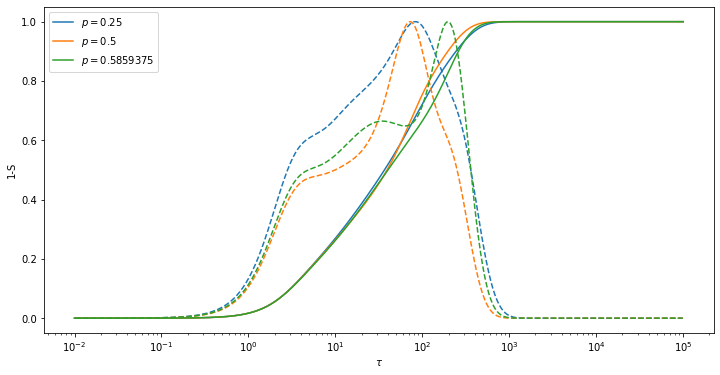

In [21]:
L = 32
L2= L*L
plt.figure(figsize=(12, 6))
t1Sm1Avg = []
t1CsAvg = []
for p in [512, 1024, 1200]:
    G = nx.grid_2d_graph(L, L, periodic=True)

    ransample = random.sample(range(len(G.edges())), p)
    for i,e in enumerate(G.edges()):
        G.add_edge(e[0], e[1], weight=1)
        if i in ransample:
            G[e[0]][e[1]]['weight'] = -1
    [Sm1, dS1, VarL1, t1] = entropy(G, is_signed=True, t2=5)
    t1Sm1Avg.append([t1, Sm1])
    plt.plot(t1, Sm1, label=fr'$p={p/(2 *L2)}$')
    t11 = (t1[1:]+t1[:-1])/2.0
    plt.plot(t11, dS1/np.max(dS1), ls='--',
                color=plt.gca().lines[-1].get_color())
    t1CsAvg.append([t11, dS1])

plt.ylabel('1-S')
plt.xlabel(r'$\tau$')
# plt.ylim(0, 5)
plt.xscale('log')
plt.legend()

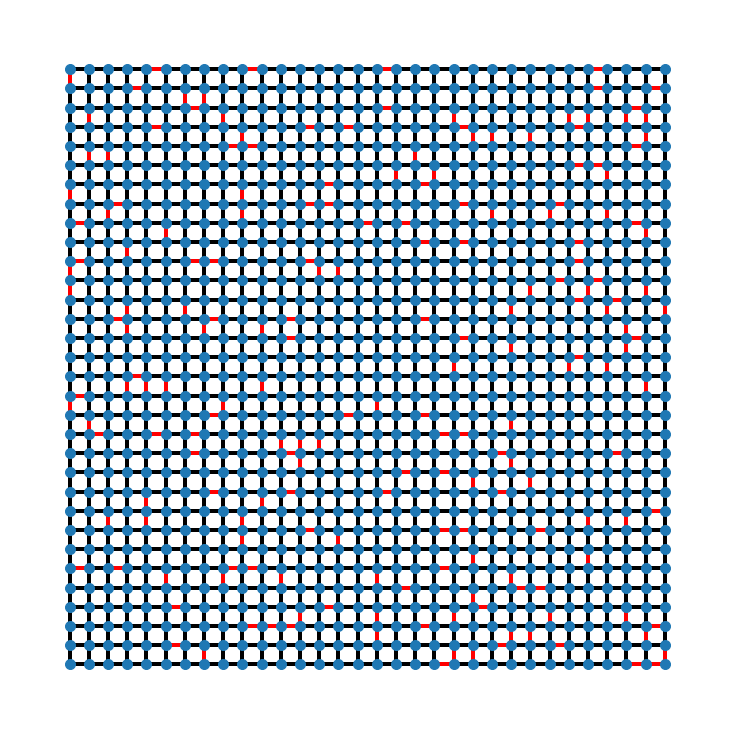

In [7]:
colors = ['r' if G[u][v]['weight'] == -1 else 'k' for u, v in G.edges()]
plt.figure(figsize=(10, 10))
pos = {(x,y):(y,-x) for x,y in G.nodes()}
nx.draw(G, edge_color=colors, pos=pos, node_size=100, width=4)

/home/opisthofulax/PhD/projects/complex-networks/LRG-Signed/notebooks/../src/LRGSG_package/LRGSG.py:76: RuntimeWarning: divide by zero encountered in log
  S[i] = -np.nansum(rho * np.log(rho)) / np.log(N)
/home/opisthofulax/PhD/projects/complex-networks/LRG-Signed/notebooks/../src/LRGSG_package/LRGSG.py:76: RuntimeWarning: invalid value encountered in multiply
  S[i] = -np.nansum(rho * np.log(rho)) / np.log(N)


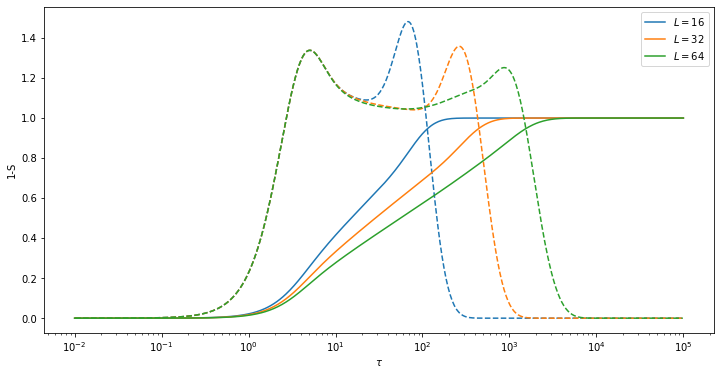

In [6]:


plt.figure(figsize=(12, 6))
t1Sm1Avg = []
t1CsAvg = []
for L in [16, 32, 64]:
    G = nx.grid_2d_graph(L, L, periodic=True)
    L2= L*L
    p = int(0.01 * len(G.edges()))
    ransample = random.sample(range(len(G.edges())), p)
    for i,e in enumerate(G.edges()):
        G.add_edge(e[0], e[1], weight=1)
        if i in ransample:
            G[e[0]][e[1]]['weight'] = -1
    [Sm1, dS1, VarL1, t1] = entropy(G, is_signed=True, t2=5)
    t1Sm1Avg.append([t1, Sm1])
    plt.plot(t1, Sm1, label=fr'$L={L}$')
    t11 = (t1[1:]+t1[:-1])/2.0
    plt.plot(t11, dS1, ls='--',
                color=plt.gca().lines[-1].get_color())
    # t1CsAvg.append([t11, dS1])

plt.ylabel('1-S')
plt.xlabel(r'$\tau$')
# plt.ylim(0, 5)
plt.xscale('log')
# plt.yscale('log')
plt.legend()

In [3]:
import numpy as np 
L = np.array([16, 32, 64])**2
L*0.103

array([ 26.368, 105.472, 421.888])

/home/opisthofulax/PhD/projects/complex-networks/LRG-Signed/notebooks/../src/LRGSG_package/LRGSG.py:75: RuntimeWarning: invalid value encountered in divide
  rho = np.divide(rhoTr, Tr)
/home/opisthofulax/PhD/projects/complex-networks/LRG-Signed/notebooks/../src/LRGSG_package/LRGSG.py:77: RuntimeWarning: invalid value encountered in scalar divide
  avgrho = np.nansum(np.multiply(w, rhoTr)) / Tr
/home/opisthofulax/PhD/projects/complex-networks/LRG-Signed/notebooks/../src/LRGSG_package/LRGSG.py:78: RuntimeWarning: invalid value encountered in scalar divide
  av2rho = np.nansum(np.multiply(np.multiply(w,w), rhoTr)) / Tr


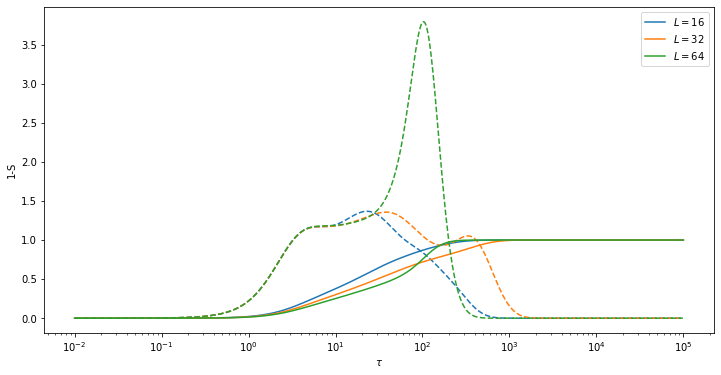

In [7]:
plt.figure(figsize=(12, 6))
t1Sm1Avg = []
t1CsAvg = []
for L in [16, 32, 64]:
    G = nx.grid_2d_graph(L, L, periodic=True)
    L2= L*L
    p = int(0.1 * len(G.edges()))
    ransample = random.sample(range(len(G.edges())), p)
    for i,e in enumerate(G.edges()):
        G.add_edge(e[0], e[1], weight=1)
        if i in ransample:
            G[e[0]][e[1]]['weight'] = -1
    [Sm1, dS1, VarL1, t1] = entropy(G, is_signed=True, t2=5)
    t1Sm1Avg.append([t1, Sm1])
    plt.plot(t1, Sm1, label=fr'$L={L}$')
    t11 = (t1[1:]+t1[:-1])/2.0
    plt.plot(t11, dS1, ls='--',
                color=plt.gca().lines[-1].get_color())
    # t1CsAvg.append([t11, dS1])

plt.ylabel('1-S')
plt.xlabel(r'$\tau$')
# plt.ylim(0, 5)
plt.xscale('log')
# plt.yscale('log')
plt.legend()

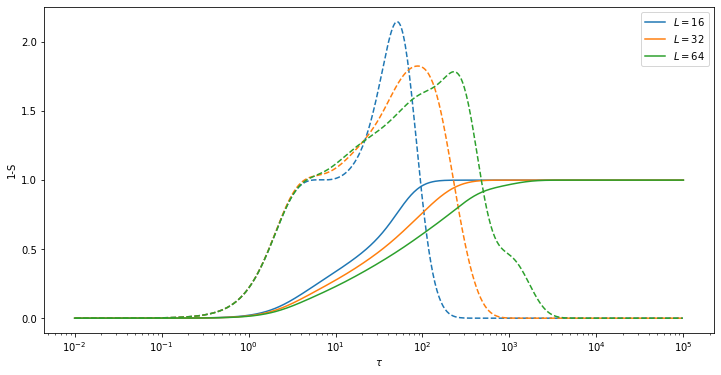

In [7]:
plt.figure(figsize=(12, 6))
t1Sm1Avg = []
t1CsAvg = []
for L in [16, 32, 64]:
    G = nx.grid_2d_graph(L, L, periodic=True)
    L2= L*L
    p = int(0.2 * len(G.edges()))
    ransample = random.sample(range(len(G.edges())), p)
    for i,e in enumerate(G.edges()):
        G.add_edge(e[0], e[1], weight=1)
        if i in ransample:
            G[e[0]][e[1]]['weight'] = -1
    [Sm1, dS1, VarL1, t1] = entropy(G, is_signed=True, t2=5)
    t1Sm1Avg.append([t1, Sm1])
    plt.plot(t1, Sm1, label=fr'$L={L}$')
    t11 = (t1[1:]+t1[:-1])/2.0
    plt.plot(t11, dS1, ls='--',
                color=plt.gca().lines[-1].get_color())
    # t1CsAvg.append([t11, dS1])

plt.ylabel('1-S')
plt.xlabel(r'$\tau$')
# plt.ylim(0, 5)
plt.xscale('log')
# plt.yscale('log')
plt.legend()

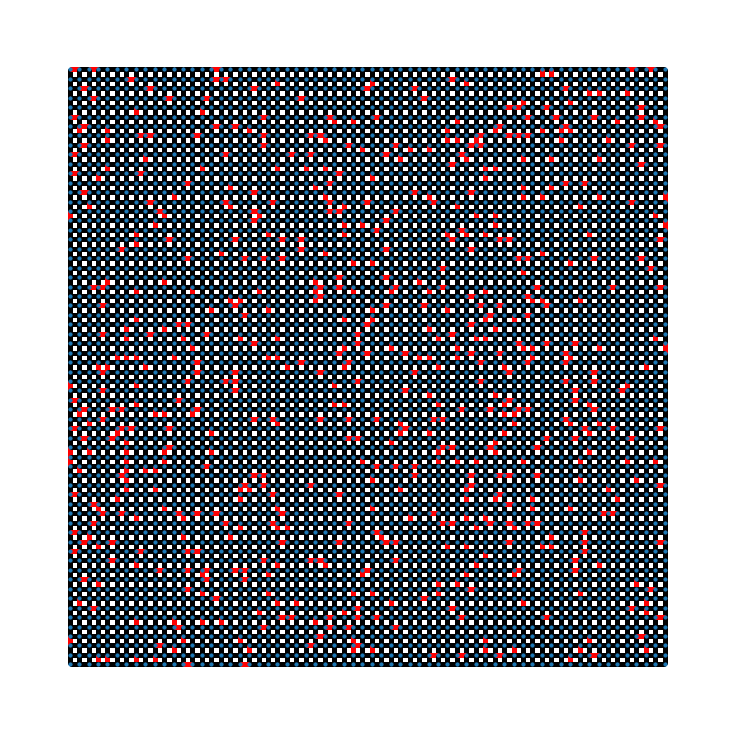

In [5]:
colors = ['r' if G[u][v]['weight'] == -1 else 'k' for u, v in G.edges()]
plt.figure(figsize=(10, 10))
pos = {(x,y):(y,-x) for x,y in G.nodes()}
nx.draw(G, edge_color=colors, pos=pos, node_size=10, width=5)

In [3]:
G = nx.grid_2d_graph(L, L, periodic=True)
L2= L*L
p = int(0.2 * len(G.edges()))
ransample = random.sample(range(len(G.edges())), p)
for i,e in enumerate(G.edges()):
    G.add_edge(e[0], e[1], weight=1)
    if i in ransample:
        G[e[0]][e[1]]['weight'] = -1
lapl, w = get_graph_lspectrum_rw(G, is_signed=True)

NameError: name 'L' is not defined

In [2]:
from scipy.sparse.linalg import eigs
L = 256
G = nx.grid_2d_graph(L, L, periodic=True)
lapl = nx.laplacian_matrix(G).asfptype()
a = eigs(lapl, k=1, which='SM', return_eigenvectors=False)